In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv('sgemm_product.csv')

In [3]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
data.shape

(241600, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [6]:
data.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [7]:
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4

In [8]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Mean_Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [9]:
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

In [10]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [11]:
np.array(data.columns)

array(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Mean_Runtime'],
      dtype=object)

In [12]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [13]:
x = data.iloc[:,0:-1].values
y = data['Mean_Runtime'].values

In [14]:
print(x.shape)

print(type(x))

print(y.shape)

print(type(y))

(241600, 14)
<class 'numpy.ndarray'>
(241600,)
<class 'numpy.ndarray'>


In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [18]:
print(type(x_train))

print(x_train.shape)

print(type(x_test))

print(x_test.shape)

<class 'numpy.ndarray'>
(169120, 14)
<class 'numpy.ndarray'>
(72480, 14)


In [19]:
theta = np.zeros([15,1])

m = len(x_train)

ones = np.ones((m,1))

x_train = np.hstack((ones, x_train))

In [20]:
m1 = len(x_test)

ones1 = np.ones((m1,1))

x_test = np.hstack((ones1, x_test))

In [21]:
def costfunction(X, Y, theta):
    
    error = np.dot(X, theta) - Y
    
    return np.sqrt(np.sum(np.power(error, 2)) / (2*m))



In [22]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [23]:
costfunction(x_train, y_train, theta)

302.542457900703

In [34]:

def gradient_descent(X, Y, B, alpha, iterations):
    
    rmse_history_train = []
    
    rmse_history_test = []
    
    m = len(Y)
    
    for iteration in range(iterations):
        
        h = X.dot(B)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        rmse_train = costfunction(X, Y, B)
        
        rmse_history_train.append(rmse_train)
        
        
        rmse_test = costfunction(x_test, y_test, B)
        
        rmse_history_test.append(rmse_test)
    
        
        
        #if len(rmse_history_train) > 1:
        
            #if rmse_history_train[iteration-1] - rmse_history_train[iteration] < threshold:
                
                #break
        
    return B, rmse_history_train, rmse_history_test


###### $H(\Theta)$ = 217.36268932 + 141.35 MWG + 130.84 NWG + 40.43 KWG - 130.77  MDIMC - 128.51  NDIMC + 8.91 MDIMA + 10.15 NDIMB +  11.85 KWI -2.55 VWM -5.72 VWN -4.50 STRM + 0.17 STRN + 19 SA + 23 SB

In [35]:
B1,  rmse_history_train1, rmse_history_test1 = gradient_descent(x_train, y_train, theta, 0.0001, 2000)

B2,  rmse_history_train2, rmse_history_test2 = gradient_descent(x_train, y_train, theta, 0.001, 2000 )

B3,  rmse_history_train3, rmse_history_test3 = gradient_descent(x_train, y_train, theta, 0.01, 2000)

B4,  rmse_history_train4, rmse_history_test4 = gradient_descent(x_train, y_train, theta, 0.1, 2000)

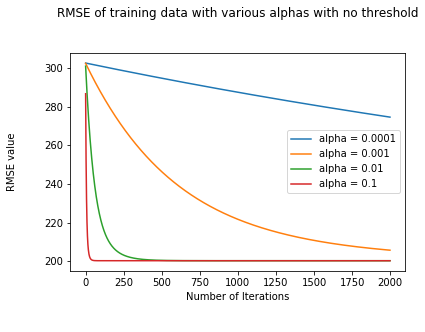

In [86]:
plt.plot(rmse_history_train1,  label='alpha = 0.0001')

plt.plot(rmse_history_train2,  label ='alpha = 0.001')

plt.plot(rmse_history_train3,  label ='alpha = 0.01')

plt.plot(rmse_history_train4,  label ='alpha = 0.1')


plt.legend()

plt.title('RMSE of training data with various alphas with no threshold\n\n')

plt.xlabel('Number of Iterations\n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

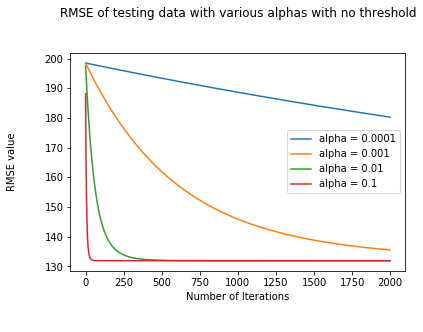

In [88]:
plt.plot(rmse_history_test1,  label='alpha = 0.0001')

plt.plot(rmse_history_test2,  label ='alpha = 0.001')

plt.plot(rmse_history_test3,  label ='alpha = 0.01')

plt.plot(rmse_history_test4,  label ='alpha = 0.1')

plt.legend()

plt.title('RMSE of testing data with various alphas with no threshold\n\n')

plt.xlabel('Number of Iterations\n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

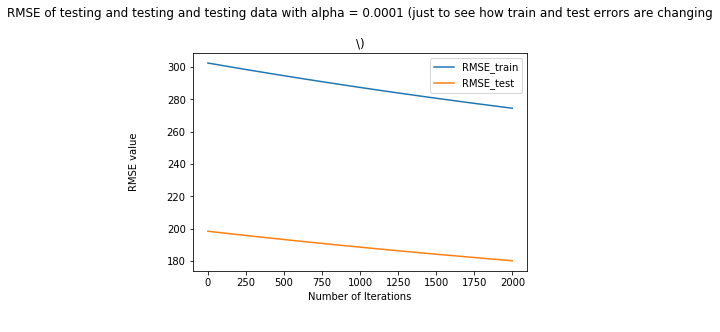

In [85]:
plt.plot(rmse_history_train1, label = 'RMSE_train')
plt.plot(rmse_history_test1, label = 'RMSE_test')

plt.legend()

plt.title('RMSE of testing and testing and testing data with alpha = 0.0001 (just to see how train and test errors are changing\n\n\)')

plt.xlabel('Number of Iterations\n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

In [49]:
y_pred_test1 = np.dot(x_test, B1)
y_pred_test2 = np.dot(x_test, B2)
y_pred_test3 = np.dot(x_test, B3)
y_pred_test4 = np.dot(x_test, B4)

y_pred_train1 = np.dot(x_train, B1)
y_pred_train2 = np.dot(x_train, B2)
y_pred_train3 = np.dot(x_train, B3)
y_pred_train4 = np.dot(x_train, B4)


In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
rmse_train1 = mean_squared_error(y_train, y_pred_train1)
rmse_train2 = mean_squared_error(y_train, y_pred_train2)
rmse_train3 = mean_squared_error(y_train, y_pred_train3)
rmse_train4 = mean_squared_error(y_train, y_pred_train4)

In [52]:
rmse_test1 = mean_squared_error(y_test, y_pred_test1)
rmse_test2 = mean_squared_error(y_test, y_pred_test2)
rmse_test3 = mean_squared_error(y_test, y_pred_test3)
rmse_test4 = mean_squared_error(y_test, y_pred_test4)

In [53]:
alpha_values = [0.0001,0.001,0.01,0.1]
rmse_train_values = np.sqrt([rmse_train1,rmse_train2,rmse_train3,rmse_train4])
rmse_test_values = np.sqrt([rmse_test1, rmse_test2, rmse_test3, rmse_test4])

In [54]:
rmse_test_values

array([389.45977978, 292.8441518 , 285.01093359, 285.01091544])

In [55]:
rmse_train_values

array([388.30926077, 291.04403945, 283.35260907, 283.35260903])

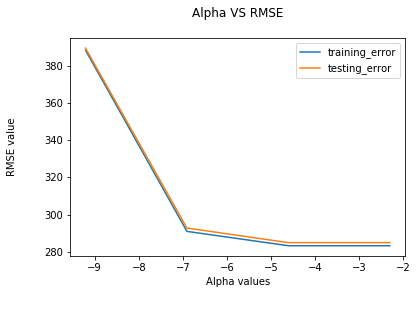

In [74]:
plt.plot(np.log(alpha_values), rmse_train_values, label = 'training_error')
plt.plot(np.log(alpha_values), rmse_test_values, label = 'testing_error')
plt.legend()

plt.title('Alpha VS RMSE\n')

plt.xlabel('Alpha values\n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

In [59]:

def gradient_descent_t(X, Y, B, alpha, iterations, threshold):
    
    rmse_history_train_t = []
    
    rmse_history_test_t = []
    
    m = len(Y)
    
    for iteration in range(iterations):
        
        h = X.dot(B)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        rmse_train = costfunction(X, Y, B)
        
        rmse_history_train_t.append(rmse_train)
        
        
        rmse_test = costfunction(x_test, y_test, B)
        
        rmse_history_test_t.append(rmse_test)
    
        
        
        if len(rmse_history_train_t) > 1:
        
            if rmse_history_train_t[iteration-1] - rmse_history_train_t[iteration] < threshold:
                
                break
        
    return B, rmse_history_train_t, rmse_history_test_t


In [61]:
B5,  rmse_history_train_t5, rmse_history_test_t5 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.000001 )

B6,  rmse_history_train_t6, rmse_history_test_t6 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.00001)

B7,  rmse_history_train_t7, rmse_history_test_t7 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.0001)

B8,  rmse_history_train_t8, rmse_history_test_t8 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.001)

In [62]:
y_pred_test5 = np.dot(x_test, B5)
y_pred_test6 = np.dot(x_test, B6)
y_pred_test7 = np.dot(x_test, B7)
y_pred_test8 = np.dot(x_test, B8)

y_pred_train5 = np.dot(x_train, B5)
y_pred_train6 = np.dot(x_train, B6)
y_pred_train7 = np.dot(x_train, B7)
y_pred_train8 = np.dot(x_train, B8)


In [63]:
rmse_train5 = mean_squared_error(y_train, y_pred_train5)
rmse_train6 = mean_squared_error(y_train, y_pred_train6)
rmse_train7 = mean_squared_error(y_train, y_pred_train7)
rmse_train8 = mean_squared_error(y_train, y_pred_train8)

rmse_test5 = mean_squared_error(y_test, y_pred_test5)
rmse_test6 = mean_squared_error(y_test, y_pred_test6)
rmse_test7 = mean_squared_error(y_test, y_pred_test7)
rmse_test8 = mean_squared_error(y_test, y_pred_test8)

In [64]:
threshold_values = [10**-5,10**-4, 10**-3, 10**-2]
rmse_train_values_1 = np.sqrt([rmse_train5,rmse_train6,rmse_train7,rmse_train8])
rmse_test_values_1 = np.sqrt([rmse_test5, rmse_test6, rmse_test7, rmse_test8])

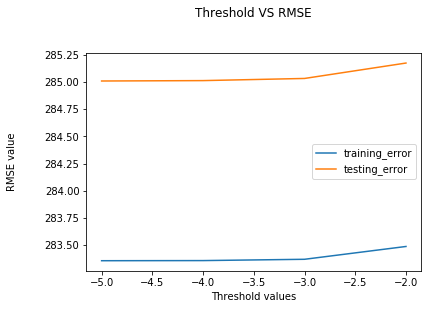

In [78]:
plt.plot(np.log10(threshold_values), rmse_train_values_1, label = 'training_error')
plt.plot(np.log10(threshold_values), rmse_test_values_1, label = 'testing_error')

plt.legend()

plt.title('Threshold VS RMSE\n\n')

plt.xlabel('Threshold values\n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

In [75]:
B_f, rmse_train_f, rmse_test_f = gradient_descent_t(x_train, y_train, theta, 0.001, 2000, 0.0001 )

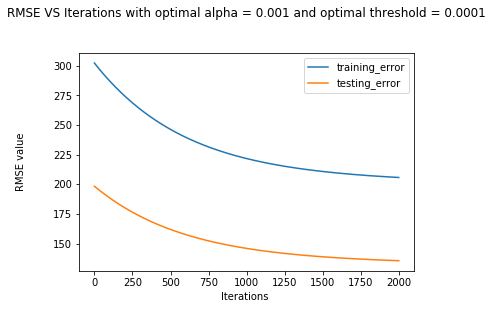

In [83]:
plt.plot(rmse_train_f, label = 'training_error')
plt.plot(rmse_test_f, label = 'testing_error')

plt.legend()

plt.title('RMSE VS Iterations with optimal alpha = 0.001 and optimal threshold = 0.0001\n\n')

plt.xlabel('Iterations \n\n')

plt.ylabel('RMSE value\n\n')

plt.show()

In [94]:
p_f = np.dot(x_test, B_f)

In [95]:
np.sqrt(mean_squared_error(y_test, p_f))

292.84415180417636

In [96]:
p_f_i = np.dot(x_test, theta)

In [97]:
np.sqrt(mean_squared_error(y_test, p_f_i))

428.8315857028381

In [104]:
pred = np.dot(x_train, B_f)
pred1 = np.dot(x_test, B_f)

In [103]:
np.sqrt(mean_squared_error(y_train, pred))

291.04403945056913

In [105]:
np.sqrt(mean_squared_error(y_test, pred1))

292.84415180417636

#### Logistic Part

In [416]:
data['Mean_Runtime'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: Mean_Runtime, dtype: float64

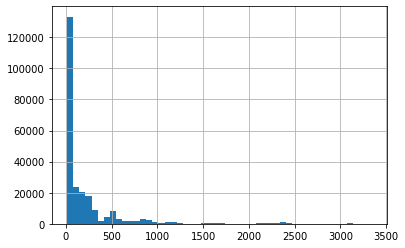

In [419]:
data['Mean_Runtime'].hist(bins = 50)

In [849]:
len(data_l)

87821

In [439]:
data_0 = data[(data['Mean_Runtime']<70)]

data_1 = data[(data['Mean_Runtime']>70)]

In [440]:
print(len(data_0))

print(len(data_1))

121124
120471


In [441]:
data1 = data.copy()
data1['Mean_Runtime'] = np.where(data1['Mean_Runtime'].between(0,70), 0, data1['Mean_Runtime'])
data1['Mean_Runtime'] = np.where(data1['Mean_Runtime'].between(70,4000), 1, data1['Mean_Runtime'])


In [446]:
data1['Mean_Runtime'].value_counts()

0.0    121129
1.0    120471
Name: Mean_Runtime, dtype: int64

In [447]:
data1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [888]:
def sigmoid(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

In [455]:
def costfunction_lr(X, Y, theta):
    
    m_lr = len(Y)
    
    predictions_lr = sigmoid(X,theta)
    
    error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
    
    cost_lr = 1/m_lr * sum(error)
    
    return cost_lr

In [454]:

def gradient_descent_lr(X, Y, B, alpha, iterations, threshold):
    
    cost_history = []

    m = len(Y)
    
    for iteration in range(iterations):
        
        h = sigmoid(X,theta)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        cost = costfunction_lr(X, Y, B)
        
        cost_history.append(cost)
        
        rmse_history.append(rmse)
        
        if len(cost_history) > 1:
        
            if cost_history[iteration-1] - cost_history[iteration] < threshold:
                
                break
        
    return B_lr, cost_history_lr


In [458]:
x_lr = data1.iloc[:,0:-1].values
y_lr = data1['Mean_Runtime'].values

In [464]:
print(x_lr.shape), print(y_lr.shape)

(241600, 14)
(241600,)


(None, None)

In [ ]:
theta = np.zeros([15,1])


In [469]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size = 0.3, random_state = 42)

In [470]:
B_lr, cost_history_lr = gradient_descent(x_train_lr, y_train_lr, theta, 0.01, 1500, 0.0001)

ValueError: shapes (169120,14) and (9,1) not aligned: 14 (dim 1) != 9 (dim 0)

In [471]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
train.select_dtypes(include=[np.number])

In [ ]:
corr = numerical_features_train_df.corr()

In [865]:
li = [1000,500,250,125,72.5,10]

In [873]:
li[0]

1

In [871]:
for i in range(len(li5):
    if li[i]-li[i01] > 50:
        print('shyam')

SyntaxError: invalid syntax (<ipython-input-871-cea79eba990a>, line 1)

In [900]:
cost_history =[]
rmse_history =[]

    
for i in range(10):
    cost_history.append(i)
    rmse_history.append(i)
        
    if len(rmse_history) >= 2:
        
        if rmse_history[i] - rmse_history[i-1] < 0.05:
                
            break

In [901]:
rmse_history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]